In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

# 定义全局变量
miu = 0.01 
g = 9.8
m = 70
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
p = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出
T = 10 # 一个时间

In [3]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*p*s*(v)**2

def f(v):
    return f1 + f2(v)

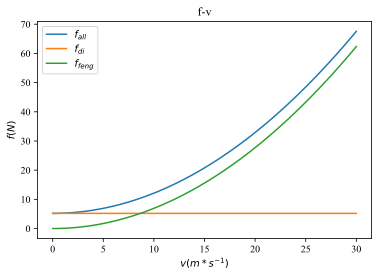

In [5]:
x = np.linspace(0,30,100)
y1=f1
y2=f2(x)
y = y1 + y2


plt.figure(1)
plt.plot(x,y,label='$f_{all}$')
plt.plot([0, 30],[y1, y1],label='$f_{di}$')
plt.plot(x,y2,label='$f_{feng}$')
plt.title("f-v")
plt.xlabel("$v(m*s^{-1})$")
plt.ylabel("$f(N)$")
plt.legend()
plt.show()



测试输出速度为20： 658.239393939394


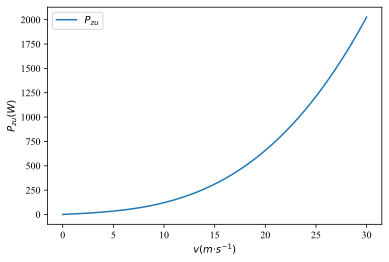

0 0.0
1 5.266257196969697
2 10.948239393939394
3 17.46167159090909
4 25.22227878787879
5 34.64578598484849
6 46.147918181818184
7 60.144400378787886
8 77.05095757575758
9 97.28331477272727


In [11]:
# 测试输出
print("测试输出速度为20：",20*(f2(20)+y1))

plt.figure(2)
P_zu = y * x
plt.plot(x,P_zu,label='$P_{zu}$')
plt.xlabel("$v(m · s^{-1})$")
plt.ylabel("$P_{zu}(W)$")
plt.legend()
plt.show()

for i in range(10):
    print(i, i*(f2(i)+y1))

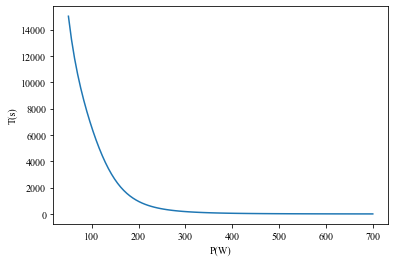

291.1213911235038
50 15016.133561031127
100 6555.730029057573
150 2580.110361107928
200 951.8279300902009
250 389.1572931700424
300 181.09770056306368
350 94.04158845989392
400 53.247472851185485
450 32.2722382350713
500 20.650163634770653
550 13.808104465512777
600 9.574436169531877
650 6.84380393007139
700 5.0198322812544625


In [11]:
# 刻画人的功率-耐力曲线    T-P曲线
W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

def T(P):
    return W_max / ( (2.38969595e-06*(P-42)**3+3.2) *P)

p = np.linspace(50,700,100)
t = T(p)
plt.plot(p,t)
plt.xlabel("P(W)")
plt.ylabel("T(s)")
plt.show()

print(T(43)/60)
for i in range(50,701):
    if i % 50 == 0:
        print(i,T(i))
